In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/facebook-recruiting-iii-keyword-extraction.zip

Archive:  /content/drive/MyDrive/facebook-recruiting-iii-keyword-extraction.zip
  inflating: SampleSubmission.csv    
  inflating: Test.zip                
  inflating: Train.zip               


In [3]:
!unzip /content/Train.zip

Archive:  /content/Train.zip
  inflating: Train.csv               


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv('/content/Train.csv')

In [6]:
data = train_data[:10000]

I took a slice of the data because the entire data is too large to work with .

In [8]:
data.head(3)

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


In [9]:
data.drop('Id',axis=1,inplace=True)
data.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10000 non-null  object
 1   Body    10000 non-null  object
 2   Tags    10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [11]:
data.shape

(10000, 3)

In [12]:
data.isnull().values.any()

False

In [13]:
data.columns

Index(['Title', 'Body', 'Tags'], dtype='object')

In [15]:
data.duplicated().values.any()

True

In [16]:
data.drop_duplicates(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
data.duplicated().values.any()

False

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   9997 non-null   object
 1   Body    9997 non-null   object
 2   Tags    9997 non-null   object
dtypes: object(3)
memory usage: 312.4+ KB


In [35]:
sample_title=data["Title"][20]
sample_body=data["Body"][20]

In [36]:
print(f"Sample Title : {sample_title}")
print(f"Sample Body : {sample_body}")

Sample Title : Are cancer recovery rates the same as they were in 1920?
Sample Body : <p><strong>Related:</strong> <a href="http://skeptics.stackexchange.com/questions/3131/have-any-cures-been-invented-since-the-1950s-or-so">Have any “cures” been invented since the 1950's or so?</a></p>

<hr>

<p>I ran across the movie <a href="http://cutpoisonburn.com/">Cut Poison Burn</a>, who's abstract is as follows:</p>

<blockquote>
  <p>Cut Poison Burn is a controversial, eye opening, and sometimes heartbreaking documentary that puts the business of cancer treatment under the microscope. Follow the frustrating journeys of critically ill cancer patients as they try to navigate the confusing and dangerous maze of treatment and encounter formidable obstacles in the “cancer industrial complex.”  A compelling critique of the influence of medical monopolies, the power of pharmaceutical companies and government agencies, Cut Poison Burn is essential viewing for anyone and everyone touched by cancer.</p

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_matrix=vectorizer.fit_transform(data['Tags'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Converted the text data in Tags column to a matrix of token counts by breaking down the text into individual words

In [65]:
tag_matrix.shape

(9997, 6124)

We have 9997 unique datapoints and 6124 unique tags

In [56]:
import sklearn

In [59]:
print(sklearn.__version__)

1.2.1


In [66]:
tags = vectorizer.get_feature_names_out()

In [67]:
print(tags[:10])

['.htaccess' '.net' '.net-2.0' '.net-3.5' '.net-4.0' '.net-4.5'
 '.net-assembly' '.net-framework' '.net4.0' '.refresh']


In [69]:
frequency = tag_matrix.sum(axis=0).A1
tags_frequency=dict(zip(tags,frequency))

Calculated the frequency of each tag in tag matrix and stored them in tags_frequency dictionary

In [70]:
tags_frequency

{'.htaccess': 40,
 '.net': 302,
 '.net-2.0': 6,
 '.net-3.5': 7,
 '.net-4.0': 10,
 '.net-4.5': 3,
 '.net-assembly': 3,
 '.net-framework': 1,
 '.net4.0': 1,
 '.refresh': 1,
 '.war': 1,
 '.x': 1,
 '1080p': 1,
 '10gbethernet': 1,
 '1and1': 1,
 '2003': 1,
 '2007': 10,
 '2010': 12,
 '2013': 1,
 '24bit': 1,
 '2d': 3,
 '2d-array': 2,
 '3.0': 2,
 '32-bit': 1,
 '32bit-64bit': 1,
 '3d': 11,
 '3d-engine': 1,
 '3d-model': 1,
 '3d-modelling': 1,
 '3dsmax': 1,
 '404-error': 1,
 '5.1': 1,
 '64-bit': 6,
 '64bit': 2,
 '6502': 1,
 '7-zip': 1,
 '802.11n': 1,
 '8086': 1,
 '8bit': 1,
 'a-record': 1,
 'a-star': 1,
 'aabb': 1,
 'abaddressbook': 1,
 'abap': 1,
 'absolute-path': 1,
 'absolute-positioning': 3,
 'abstract': 1,
 'abstract-algebra': 8,
 'abstract-class': 1,
 'accelerate-framework': 1,
 'accelerated-c++': 1,
 'accelerometer': 2,
 'access': 1,
 'access-control': 1,
 'access-denied': 1,
 'access-token': 1,
 'access-violation': 1,
 'accessibility': 2,
 'accordion': 5,
 'account': 2,
 'account-restricti

In [71]:
tag_df = pd.Series(tags_frequency)

Created a pandas series from tags_frequency dictionary

In [74]:
tag_df

.htaccess     40
.net         302
.net-2.0       6
.net-3.5       7
.net-4.0      10
            ... 
zoom           3
zooming        1
zsh            6
zshrc          2
zxing          1
Length: 6124, dtype: int64

In [75]:
tag_df = tag_df.to_frame(name='counts')
tag_df.head(3)

,counts
.htaccess,40
.net,302
.net-2.0,6


Converted the pandas series to pandas dataframe

In [78]:
sorted_df = tag_df.sort_values(['counts'],ascending=False)

Sorted the dataframe by the counts column in descending order

In [79]:
tag_counts = sorted_df['counts'].values

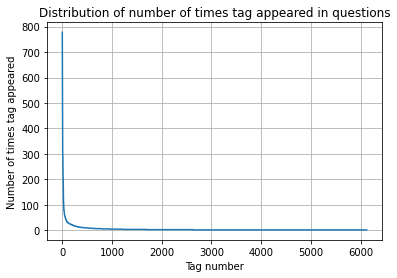

In [81]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

The visualization is not very great when taking all tags. so, lets take first 100 tags and see their distribution.

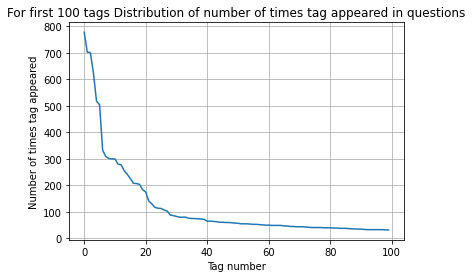

In [83]:
plt.plot(tag_counts[0:100])
plt.title('For first 100 tags Distribution of number of times tag appeared in questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [92]:
tag_question_count = tag_matrix.sum(axis=1).tolist()
tag_question_count=[int(j) for i in tag_question_count for j in i]

In [93]:
max_tags = max(tag_question_count)
min_tags = min(tag_question_count)
avg_tags = sum(tag_question_count)/len(tag_question_count)
print('The maximum number of tags in a question is',max_tags)
print('The minimum number of tags in a question is',min_tags)
print('The average number of tags in a question is',avg_tags)

The maximum number of tags in a question is 5
The minimum number of tags in a question is 1
The average number of tags in a question is 2.9166750025007504


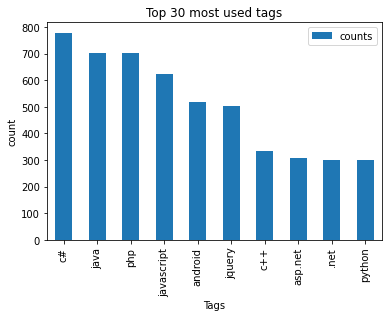

In [88]:
sorted_df.head(10).plot(kind='bar')
plt.title('Top 30 most used tags')
plt.xlabel('Tags')
plt.ylabel('count')
plt.show()

So, c# is the most frequently occuring tag among all.

In [94]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [95]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [96]:
data.head(3)

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


In [97]:
new_data = data.drop('Body',axis=1)
new_data.head(3)

,Title,Tags
0,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,firefox
2,R Error Invalid type (list) for variable,r matlab machine-learning


In [98]:
html_tag_remover = re.compile(r'<[^>]+>')

def remove_tags(text):
  return html_tag_remover.sub('', text)

In [99]:
def preprocess_text(sen):
  sentence = sen.lower()
  #Converted all texts to lower case

  sentence = remove_tags(sentence)
  #Removed html tags

  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  #Removed punctuations and numbers

  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 
  #Removed apostrophe

  sentence = re.sub(r'\s+', ' ', sentence)
  #Removed the extra spaces from the text

  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  sentence = pattern.sub('', sentence)
  #Removed Stopwords

  return sentence

In [100]:
Preprocessed_data = []
sentences = list(new_data['Title'])
for i in sentences:
  Preprocessed_data.append(preprocess_text(i))

In [109]:
Preprocessed_data[10]

'commercial obfuscators achieve crash net reflector ildasm '

In [103]:
stemmer = SnowballStemmer("english")

In [104]:
new_data['Title'] = new_data['Title'].str.split()

In [105]:
new_data['stemmed_title'] = new_data['Title'].apply(lambda x: [stemmer.stem(y) for y in x])

In [106]:
new_data.head(3)

,Title,Tags,stemmed_title
0,"[How, to, check, if, an, uploaded, file, is, a...",php image-processing file-upload upload mime-t...,"[how, to, check, if, an, upload, file, is, an,..."
1,"[How, can, I, prevent, firefox, from, closing,...",firefox,"[how, can, i, prevent, firefox, from, close, w..."
2,"[R, Error, Invalid, type, (list), for, variable]",r matlab machine-learning,"[r, error, invalid, type, (list), for, variabl]"


In [107]:
new_data.drop('Title',axis=1,inplace=True)

In [108]:
new_data.head(3)

,Tags,stemmed_title
0,php image-processing file-upload upload mime-t...,"[how, to, check, if, an, upload, file, is, an,..."
1,firefox,"[how, can, i, prevent, firefox, from, close, w..."
2,r matlab machine-learning,"[r, error, invalid, type, (list), for, variabl]"
